## Oxford flowers dataset preprocessing

##### Make imports

In [2]:
import os
import skimage.io as skio
import scipy
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms as transforms
import re
import nltk

### Data augmentation

#### Define transform

In [11]:
transform_image=transforms.Compose([transforms.ToPILImage(),transforms.RandomAffine((0,10)),transforms.RandomHorizontalFlip(1)])

In [12]:
def augment_dataset(arr, aug_idx):
    massive_array=[]
    for i in range(arr.shape[0]):
        massive_array.append(arr[i])
        for _ in range(aug_idx-1):
            massive_array.append(np.array(transform_image(arr[i])))
    return massive_array

In [13]:
def augment_dataset_text(arr, aug_idx):
    massive_array=[]
    for i in range(arr.shape[0]):
        massive_array.append(arr[i])
        for _ in range(aug_idx-1):
            massive_array.append(arr[i])
    return massive_array

### Text preprocessing functions

In [20]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(nltk.corpus.stopwords.words('english'))

def text_prepare(text):
    """
        text: a string
        
        return: modified initial string
    """
    # lowercase text
    text = text.lower()
    # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = REPLACE_BY_SPACE_RE.sub(' ', text)
    # delete symbols which are in BAD_SYMBOLS_RE from text
    text = BAD_SYMBOLS_RE.sub('',text)
    # delete stopwords from text
    text = ' '.join([i for i in text.split() if (i not in STOPWORDS) and (i!='color') and (i!='flower')])
    return text

#### Load the data

In [3]:
i = 0
pix = []
texts = []
names = []
for folder in os.listdir('.'):
    if os.path.isdir(folder):
        for file in os.listdir('./'+folder+'/'):
            if file.endswith('txt'):
                img = skio.imread('../jpg/'+file[:-3]+'jpg')
                print(file)
                names.append(file)
                pix.append(scipy.misc.imresize(img,(64,64),'bicubic'))
                f = open('./'+folder+'/'+file,'r')
                texts.append([])
                for line in f.readlines():
                    #print(line)
                    texts[i].append(line)
                i+=1

image_00731.txt
image_00681.txt
image_00671.txt


/home/ek/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  if sys.path[0] == '':


image_00656.txt
image_00711.txt
image_00727.txt
image_00679.txt
image_00648.txt
image_00698.txt
image_00717.txt
image_00660.txt
image_00759.txt
image_00693.txt
image_00761.txt
image_00705.txt
image_00649.txt
image_00627.txt
image_00690.txt
image_00701.txt
image_00695.txt
image_00729.txt
image_00743.txt
image_00624.txt
image_00722.txt
image_00776.txt
image_00616.txt
image_00737.txt
image_00602.txt
image_00704.txt
image_00779.txt
image_00697.txt
image_00745.txt
image_00684.txt
image_00642.txt
image_00615.txt
image_00718.txt
image_00741.txt
image_00772.txt
image_00620.txt
image_00628.txt
image_00651.txt
image_00699.txt
image_00640.txt
image_00636.txt
image_00728.txt
image_00639.txt
image_00700.txt
image_00603.txt
image_00670.txt
image_00626.txt
image_00659.txt
image_00702.txt
image_00607.txt
image_00733.txt
image_00612.txt
image_00664.txt
image_00635.txt
image_00762.txt
image_00777.txt
image_07284.txt
image_00751.txt
image_00609.txt
image_00721.txt
image_00676.txt
image_00643.txt
image_00

image_06350.txt
image_06355.txt
image_06370.txt
image_06352.txt
image_06374.txt
image_06391.txt
image_06377.txt
image_06364.txt
image_06371.txt
image_06376.txt
image_06363.txt
image_06379.txt
image_06365.txt
image_06356.txt
image_06382.txt
image_05250.txt
image_05246.txt
image_05221.txt
image_05264.txt
image_05212.txt
image_05215.txt
image_05277.txt
image_05230.txt
image_05249.txt
image_05266.txt
image_05254.txt
image_05219.txt
image_05269.txt
image_05236.txt
image_05222.txt
image_05239.txt
image_05267.txt
image_05257.txt
image_05271.txt
image_05213.txt
image_05258.txt
image_05262.txt
image_05270.txt
image_05232.txt
image_05251.txt
image_05223.txt
image_05217.txt
image_05214.txt
image_05244.txt
image_05255.txt
image_05224.txt
image_05268.txt
image_05275.txt
image_05243.txt
image_05260.txt
image_05225.txt
image_05241.txt
image_05252.txt
image_05231.txt
image_05265.txt
image_05247.txt
image_05242.txt
image_05245.txt
image_05218.txt
image_05227.txt
image_05229.txt
image_05237.txt
image_05

image_07091.txt
image_07088.txt
image_07098.txt
image_07086.txt
image_07087.txt
image_07104.txt
image_08096.txt
image_07111.txt
image_07096.txt
image_07122.txt
image_07105.txt
image_07116.txt
image_07112.txt
image_07095.txt
image_07115.txt
image_07110.txt
image_08092.txt
image_07093.txt
image_06837.txt
image_06839.txt
image_06826.txt
image_06827.txt
image_08053.txt
image_06816.txt
image_06830.txt
image_08051.txt
image_06846.txt
image_06843.txt
image_06824.txt
image_06833.txt
image_06825.txt
image_06829.txt
image_06832.txt
image_06818.txt
image_06835.txt
image_06814.txt
image_08048.txt
image_08049.txt
image_06823.txt
image_06840.txt
image_06845.txt
image_06815.txt
image_06828.txt
image_06841.txt
image_08052.txt
image_06822.txt
image_06834.txt
image_06821.txt
image_06831.txt
image_06838.txt
image_06847.txt
image_06836.txt
image_06849.txt
image_08050.txt
image_06820.txt
image_06842.txt
image_06844.txt
image_06819.txt
image_06817.txt
image_06848.txt
image_05060.txt
image_05053.txt
image_05

image_00356.txt
image_00288.txt
image_00443.txt
image_00324.txt
image_00371.txt
image_00354.txt
image_00337.txt
image_00285.txt
image_00262.txt
image_00335.txt
image_00300.txt
image_00403.txt
image_00431.txt
image_00405.txt
image_00299.txt
image_00287.txt
image_00437.txt
image_00290.txt
image_00260.txt
image_00389.txt
image_00254.txt
image_00303.txt
image_00316.txt
image_00366.txt
image_00315.txt
image_00392.txt
image_00256.txt
image_00325.txt
image_00444.txt
image_00332.txt
image_00355.txt
image_00301.txt
image_00386.txt
image_00382.txt
image_00257.txt
image_00280.txt
image_00349.txt
image_00328.txt
image_00410.txt
image_00393.txt
image_00417.txt
image_00274.txt
image_00307.txt
image_00334.txt
image_00400.txt
image_00367.txt
image_00394.txt
image_00363.txt
image_00380.txt
image_00263.txt
image_00304.txt
image_00277.txt
image_00401.txt
image_00445.txt
image_00414.txt
image_00373.txt
image_00353.txt
image_00276.txt
image_00413.txt
image_00391.txt
image_00425.txt
image_00388.txt
image_00

image_00850.txt
image_00897.txt
image_00841.txt
image_00810.txt
image_00813.txt
image_00858.txt
image_00820.txt
image_00790.txt
image_00874.txt
image_00804.txt
image_00920.txt
image_00926.txt
image_00866.txt
image_00868.txt
image_00881.txt
image_00812.txt
image_00791.txt
image_00829.txt
image_00849.txt
image_00815.txt
image_00871.txt
image_00848.txt
image_00883.txt
image_00877.txt
image_00807.txt
image_00891.txt
image_00857.txt
image_00805.txt
image_00931.txt
image_00811.txt
image_00839.txt
image_00942.txt
image_00886.txt
image_00901.txt
image_00798.txt
image_00846.txt
image_00876.txt
image_00863.txt
image_00911.txt
image_00922.txt
image_00823.txt
image_00934.txt
image_00845.txt
image_00797.txt
image_00831.txt
image_00838.txt
image_00856.txt
image_00890.txt
image_00918.txt
image_00799.txt
image_00875.txt
image_00872.txt
image_00835.txt
image_00796.txt
image_00924.txt
image_00861.txt
image_00840.txt
image_00904.txt
image_00923.txt
image_00826.txt
image_00855.txt
image_00808.txt
image_00

image_05003.txt
image_05009.txt
image_04980.txt
image_04966.txt
image_04983.txt
image_04985.txt
image_04979.txt
image_04998.txt
image_05018.txt
image_04973.txt
image_04974.txt
image_04968.txt
image_04978.txt
image_04989.txt
image_04964.txt
image_04956.txt
image_04961.txt
image_05007.txt
image_04999.txt
image_04965.txt
image_05019.txt
image_04986.txt
image_05006.txt
image_04987.txt
image_04992.txt
image_04975.txt
image_04994.txt
image_04993.txt
image_04976.txt
image_04954.txt
image_04996.txt
image_05008.txt
image_04957.txt
image_04990.txt
image_04982.txt
image_05011.txt
image_04963.txt
image_04988.txt
image_05014.txt
image_04969.txt
image_04199.txt
image_04235.txt
image_04174.txt
image_04233.txt
image_04166.txt
image_04240.txt
image_04220.txt
image_04222.txt
image_04231.txt
image_04190.txt
image_04217.txt
image_04212.txt
image_04228.txt
image_04214.txt
image_04163.txt
image_04211.txt
image_04185.txt
image_04216.txt
image_04241.txt
image_04232.txt
image_04179.txt
image_04193.txt
image_04

image_06159.txt
image_06166.txt
image_06181.txt
image_06190.txt
image_06175.txt
image_06165.txt
image_06162.txt
image_06161.txt
image_06197.txt
image_06152.txt
image_06149.txt
image_06156.txt
image_06171.txt
image_06163.txt
image_06185.txt
image_06180.txt
image_06177.txt
image_06186.txt
image_06176.txt
image_06150.txt
image_06153.txt
image_06173.txt
image_06151.txt
image_06179.txt
image_06169.txt
image_06194.txt
image_06170.txt
image_06155.txt
image_06612.txt
image_06647.txt
image_06651.txt
image_06645.txt
image_06614.txt
image_06640.txt
image_06618.txt
image_06621.txt
image_06624.txt
image_06644.txt
image_06613.txt
image_06617.txt
image_06620.txt
image_06641.txt
image_06625.txt
image_06643.txt
image_06615.txt
image_06619.txt
image_06623.txt
image_06632.txt
image_06649.txt
image_06631.txt
image_06642.txt
image_06635.txt
image_06628.txt
image_06633.txt
image_06638.txt
image_06626.txt
image_06634.txt
image_06616.txt
image_06648.txt
image_06646.txt
image_06627.txt
image_06622.txt
image_06

image_01734.txt
image_01801.txt
image_01818.txt
image_01775.txt
image_01723.txt
image_01727.txt
image_01786.txt
image_01817.txt
image_01752.txt
image_01820.txt
image_01731.txt
image_01804.txt
image_01809.txt
image_01772.txt
image_01751.txt
image_01816.txt
image_01821.txt
image_01790.txt
image_01789.txt
image_01773.txt
image_01729.txt
image_01740.txt
image_01799.txt
image_01722.txt
image_01737.txt
image_01721.txt
image_01738.txt
image_01808.txt
image_01743.txt
image_01712.txt
image_01800.txt
image_01696.txt
image_01811.txt
image_01728.txt
image_01746.txt
image_01744.txt
image_01819.txt
image_01788.txt
image_01823.txt
image_01748.txt
image_01755.txt
image_01758.txt
image_01716.txt
image_01777.txt
image_01717.txt
image_01776.txt
image_01778.txt
image_01769.txt
image_01704.txt
image_01750.txt
image_01714.txt
image_01802.txt
image_01724.txt
image_01730.txt
image_01810.txt
image_01792.txt
image_01698.txt
image_01785.txt
image_01754.txt
image_01796.txt
image_01765.txt
image_01739.txt
image_01

image_05177.txt
image_05178.txt
image_05161.txt
image_05187.txt
image_05189.txt
image_05167.txt
image_05192.txt
image_05157.txt
image_05169.txt
image_05201.txt
image_05148.txt
image_05162.txt
image_05149.txt
image_05179.txt
image_05163.txt
image_05155.txt
image_05158.txt
image_05197.txt
image_05185.txt
image_05164.txt
image_05211.txt
image_05207.txt
image_05152.txt
image_05196.txt
image_05203.txt
image_05191.txt
image_05154.txt
image_05147.txt
image_05209.txt
image_05184.txt
image_05159.txt
image_05182.txt
image_05170.txt
image_05199.txt
image_05153.txt
image_05190.txt
image_05188.txt
image_05160.txt
image_05193.txt
image_05181.txt
image_05172.txt
image_05180.txt
image_05205.txt
image_06480.txt
image_06446.txt
image_06464.txt
image_06470.txt
image_06442.txt
image_06458.txt
image_06454.txt
image_06479.txt
image_06481.txt
image_06463.txt
image_06452.txt
image_06453.txt
image_06455.txt
image_06448.txt
image_06459.txt
image_06457.txt
image_06456.txt
image_06451.txt
image_06445.txt
image_06

image_06713.txt
image_06733.txt
image_06701.txt
image_06711.txt
image_06722.txt
image_06724.txt
image_06730.txt
image_06714.txt
image_06702.txt
image_06732.txt
image_06705.txt
image_06709.txt
image_06723.txt
image_06704.txt
image_06696.txt
image_06708.txt
image_06710.txt
image_06697.txt
image_06725.txt
image_06716.txt
image_06706.txt
image_06693.txt
image_06694.txt
image_06727.txt
image_06700.txt
image_06729.txt
image_06726.txt
image_06699.txt
image_03016.txt
image_02939.txt
image_02980.txt
image_02977.txt
image_02999.txt
image_02995.txt
image_02967.txt
image_02998.txt
image_02934.txt
image_02920.txt
image_03006.txt
image_02942.txt
image_02979.txt
image_02944.txt
image_03002.txt
image_02975.txt
image_02929.txt
image_02938.txt
image_02997.txt
image_02994.txt
image_02993.txt
image_02966.txt
image_02928.txt
image_02936.txt
image_02937.txt
image_02955.txt
image_02921.txt
image_02988.txt
image_02986.txt
image_03026.txt
image_02973.txt
image_03028.txt
image_02987.txt
image_02960.txt
image_02

image_04801.txt
image_04825.txt
image_04781.txt
image_04780.txt
image_04782.txt
image_07301.txt
image_04796.txt
image_04820.txt
image_04821.txt
image_04798.txt
image_04772.txt
image_04794.txt
image_04807.txt
image_04819.txt
image_04828.txt
image_04786.txt
image_04812.txt
image_04808.txt
image_04778.txt
image_04775.txt
image_04824.txt
image_04779.txt
image_04816.txt
image_04785.txt
image_04810.txt
image_04809.txt
image_04791.txt
image_04806.txt
image_04790.txt
image_04774.txt
image_04788.txt
image_04818.txt
image_04817.txt
image_04784.txt
image_04777.txt
image_04768.txt
image_04804.txt
image_04770.txt
image_04813.txt
image_04795.txt
image_04771.txt
image_04803.txt
image_04822.txt
image_04793.txt
image_04823.txt
image_04792.txt
image_04805.txt
image_04767.txt
image_04789.txt
image_04800.txt
image_04783.txt
image_04776.txt
image_04814.txt
image_04815.txt
image_04769.txt
image_04787.txt
image_04802.txt
image_04797.txt
image_04827.txt
image_04811.txt
image_04773.txt
image_04799.txt
image_03

image_02233.txt
image_02282.txt
image_02226.txt
image_02313.txt
image_02240.txt
image_02311.txt
image_02273.txt
image_02299.txt
image_02264.txt
image_02254.txt
image_02300.txt
image_02189.txt
image_02252.txt
image_02222.txt
image_02202.txt
image_02312.txt
image_02218.txt
image_02298.txt
image_02281.txt
image_02238.txt
image_02242.txt
image_02216.txt
image_02253.txt
image_02196.txt
image_02190.txt
image_02302.txt
image_07037.txt
image_07023.txt
image_07044.txt
image_07026.txt
image_07020.txt
image_07039.txt
image_07011.txt
image_07041.txt
image_07034.txt
image_07016.txt
image_07009.txt
image_08080.txt
image_08081.txt
image_07029.txt
image_07043.txt
image_07007.txt
image_07014.txt
image_07019.txt
image_07022.txt
image_07010.txt
image_07032.txt
image_07035.txt
image_07033.txt
image_07040.txt
image_07021.txt
image_07045.txt
image_07017.txt
image_07018.txt
image_07024.txt
image_07025.txt
image_07031.txt
image_07015.txt
image_07013.txt
image_07008.txt
image_07042.txt
image_07028.txt
image_07

image_01191.txt
image_01164.txt
image_01189.txt
image_01241.txt
image_01186.txt
image_01263.txt
image_01177.txt
image_01288.txt
image_01165.txt
image_01197.txt
image_01206.txt
image_01258.txt
image_01153.txt
image_01221.txt
image_01249.txt
image_01251.txt
image_01223.txt
image_01159.txt
image_01276.txt
image_01236.txt
image_01284.txt
image_01146.txt
image_01292.txt
image_01305.txt
image_01260.txt
image_01268.txt
image_01218.txt
image_01238.txt
image_01256.txt
image_01295.txt
image_01203.txt
image_01207.txt
image_01200.txt
image_01152.txt
image_01169.txt
image_01161.txt
image_01245.txt
image_01150.txt
image_01257.txt
image_01163.txt
image_01225.txt
image_01184.txt
image_01291.txt
image_01167.txt
image_01144.txt
image_01287.txt
image_01232.txt
image_01270.txt
image_01301.txt
image_01273.txt
image_01154.txt
image_01174.txt
image_01202.txt
image_01227.txt
image_01282.txt
image_01311.txt
image_01307.txt
image_01226.txt
image_01286.txt
image_01312.txt
image_01280.txt
image_01283.txt
image_01

image_06064.txt
image_06061.txt
image_06080.txt
image_06049.txt
image_06065.txt
image_06075.txt
image_06093.txt
image_06086.txt
image_06066.txt
image_06055.txt
image_06068.txt
image_06092.txt
image_06083.txt
image_06051.txt
image_06079.txt
image_06096.txt
image_06067.txt
image_06071.txt
image_06050.txt
image_06081.txt
image_06082.txt
image_06095.txt
image_06063.txt
image_06059.txt
image_06058.txt
image_06094.txt
image_06052.txt
image_06091.txt
image_06060.txt
image_06076.txt
image_06087.txt
image_06062.txt
image_06085.txt
image_06053.txt
image_06090.txt
image_06077.txt
image_06088.txt
image_06069.txt
image_06070.txt
image_06073.txt
image_06057.txt
image_06072.txt
image_05906.txt
image_05955.txt
image_05949.txt
image_05910.txt
image_05914.txt
image_05929.txt
image_05904.txt
image_05942.txt
image_05924.txt
image_05921.txt
image_05950.txt
image_05918.txt
image_05945.txt
image_05953.txt
image_05911.txt
image_05916.txt
image_05952.txt
image_05939.txt
image_05943.txt
image_05936.txt
image_05

image_00052.txt
image_00073.txt
image_00180.txt
image_00036.txt
image_00220.txt
image_00130.txt
image_00221.txt
image_00232.txt
image_00200.txt
image_00096.txt
image_00053.txt
image_00112.txt
image_00185.txt
image_00121.txt
image_00019.txt
image_00175.txt
image_00251.txt
image_00091.txt
image_00093.txt
image_00184.txt
image_00210.txt
image_00142.txt
image_00189.txt
image_00066.txt
image_00198.txt
image_00145.txt
image_00040.txt
image_00146.txt
image_00207.txt
image_00204.txt
image_00179.txt
image_00247.txt
image_00174.txt
image_00106.txt
image_00065.txt
image_00125.txt
image_00205.txt
image_00102.txt
image_00169.txt
image_00187.txt
image_00081.txt
image_00188.txt
image_00224.txt
image_00127.txt
image_00005.txt
image_00226.txt
image_00110.txt
image_00177.txt
image_00101.txt
image_00153.txt
image_00082.txt
image_00001.txt
image_00235.txt
image_00203.txt
image_00228.txt
image_00070.txt
image_00029.txt
image_00027.txt
image_00152.txt
image_00234.txt
image_00113.txt
image_00225.txt
image_00

image_06511.txt
image_06507.txt
image_06520.txt
image_06494.txt
image_06487.txt
image_06489.txt
image_06491.txt
image_06488.txt
image_06497.txt
image_06521.txt
image_06517.txt
image_06493.txt
image_06527.txt
image_06524.txt
image_06502.txt
image_06523.txt
image_06495.txt
image_06515.txt
image_06518.txt
image_06509.txt
image_06514.txt
image_06522.txt
image_06513.txt
image_06510.txt
image_06516.txt
image_06506.txt
image_06525.txt
image_06505.txt
image_04899.txt
image_04937.txt
image_04931.txt
image_04947.txt
image_04929.txt
image_04946.txt
image_04918.txt
image_04906.txt
image_04952.txt
image_04897.txt
image_04945.txt
image_04900.txt
image_04920.txt
image_04916.txt
image_04912.txt
image_04907.txt
image_04914.txt
image_04924.txt
image_04934.txt
image_04908.txt
image_04921.txt
image_04910.txt
image_04951.txt
image_04948.txt
image_04928.txt
image_04911.txt
image_04936.txt
image_04941.txt
image_04923.txt
image_04950.txt
image_04898.txt
image_04935.txt
image_04901.txt
image_04909.txt
image_04

In [4]:
texts[0]

['flower has petals that are dark orange with a yellow stamen.\n',
 'this flower has a large blossom composed of five wide red petals with rounded tips.\n',
 'this flower is orange in color, and has petals that are round.\n',
 'the flower shown has large orange petals with yellow anther and filament\n',
 'the petals are orange and the ovary and pollen tube are yellow\n',
 'this flower is orange and yellow in color, and has petals that are circular in shape.\n',
 'the unique bright orange flower has five rounded pedals that surround a yellow center.\n',
 'this flower has orange round petals with brown stamen in the middle.\n',
 'this flower has petals that are orange and has yellow shading\n',
 'this has very wide light green leaves and the flower has five wide orange petals with yellow stigmas.\n']

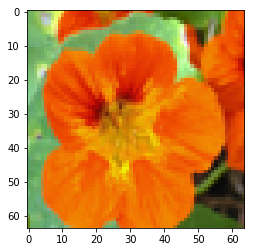

In [6]:
plt.imshow(pix[0])

In [8]:
shuffle = np.random.permutation(range(len(pix)))

In [9]:
pix_dataset = np.array(pix)[shuffle]

In [10]:
pix_train = pix_dataset[100:]
pix_test = pix_dataset[:100]

### Augment image dataset

In [14]:
augmented_pix = augment_dataset(pix_train, 2)

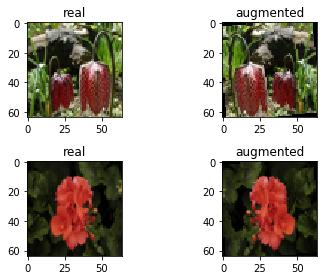

In [15]:
_,ax=plt.subplots(2,2)
ax[0,0].imshow(augmented_pix[0].squeeze())
ax[0,0].set_title('real')
ax[0,1].imshow(augmented_pix[1])
ax[0,1].set_title('augmented')
ax[1,0].imshow(augmented_pix[2].squeeze())
ax[1,0].set_title('real')
ax[1,1].imshow(augmented_pix[3])
ax[1,1].set_title('augmented')
plt.tight_layout()

In [17]:
aug_train_shuffle = np.random.permutation(len(augmented_pix))

In [18]:
augmented_pix = np.array(augmented_pix)

In [19]:
augmented_pix = augmented_pix[aug_train_shuffle]

In [ ]:
np.save('augmented_training_flowers.npy',np.array(augmented_pix))

In [27]:
augmented_pix = augment_dataset(pix_test, 2)

In [ ]:
np.save('augmented_test_flowers.npy',np.array(augmented_pix)) 

### Tokenize and clean texts

In [28]:
data_texts = np.array(texts)

In [29]:
tokenized_data=[]
for j in range(len(data_texts)):
    tokenized_data.append([nltk.tokenize.word_tokenize(text_prepare(i)) for i in data_texts[j] ])

### Join tokenized texts

In [30]:
for i in range(len(tokenized_data)):
    for j in range(len(tokenized_data[i])):
        tokenized_data[i][j]= ' '.join(tokenized_data[i][j])

In [31]:
tokenized_data[0]

['petals dark orange yellow stamen',
 'large blossom composed five wide red petals rounded tips',
 'orange petals round',
 'shown large orange petals yellow anther filament',
 'petals orange ovary pollen tube yellow',
 'orange yellow petals circular shape',
 'unique bright orange five rounded pedals surround yellow center',
 'orange round petals brown stamen middle',
 'petals orange yellow shading',
 'wide light green leaves five wide orange petals yellow stigmas']

In [32]:
text_data = np.array(tokenized_data)

In [35]:
texts_train = text_data[shuffle][100:]
text_test = text_data[shuffle][:100]

In [36]:
texts_train = augment_dataset_text(texts_train,2)

In [37]:
text_test = augment_dataset_text(text_test,2)

In [41]:
texts_train = np.array(texts_train)
text_test = np.array(text_test)

### Texts to sequences

In [42]:
from keras.preprocessing.sequence import pad_sequences
import keras
from keras.preprocessing.text import Tokenizer
# tokenize the inputs
tokenizer_inputs = Tokenizer(num_words=3000,) #filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
tokenizer_inputs.fit_on_texts(texts_train.reshape((len(texts_train)*10,)))
input_sequences = tokenizer_inputs.texts_to_sequences(texts_train.reshape((len(texts_train)*10,)))
a = pad_sequences(input_sequences,maxlen=25)
# get the word to index mapping for input language
word2idx_inputs = tokenizer_inputs.word_index
print('Found %s unique input tokens.' % len(word2idx_inputs))

# determine maximum length input sequence
max_len_input = max(len(s) for s in input_sequences)

Found 5935 unique input tokens.


In [ ]:
np.save('train_texts_flowers_preprocessed.npy',a.reshape((len(texts_train),10,25)))

In [44]:
input_sequences = tokenizer_inputs.texts_to_sequences(text_test.reshape((200*10,)))
a = pad_sequences(input_sequences,maxlen=25)

In [30]:
np.save('word2idxflowers.npy',word2idx_inputs)

In [43]:
np.save('test_texts_flowers_preprocessed.npy',a.reshape((200,10,25)))